In [1]:
import tensorflow as tf

In [20]:
from tensorflow.keras.datasets import mnist
#accessing train/test split data from mnist
(x_train , y_train), (x_test , y_test) = mnist.load_data()

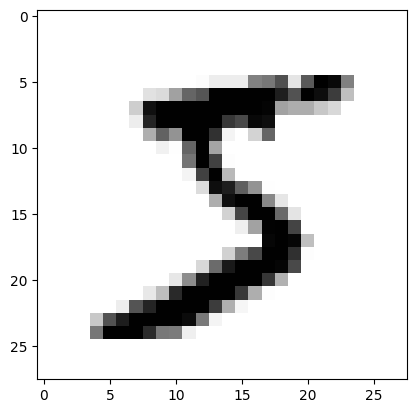

label:  5


In [9]:
#example of an image and its label from mnist dataset

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show()
print('label: ',y_train[0])

In [10]:
#one hot encoding

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [18]:
#encoded labels
print('number: ',y_train[0])
print('encoded: ',y_train_encoded[0])

number:  5
encoded:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
#N-D arrays to vectors

import numpy as np

x_train_reshaped= np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

print('x_train_reshaped shape: ',x_train_reshaped.shape)
print('x_test_reshaped shape:',x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape: (10000, 784)


In [22]:
#data normalization

x_mean=-np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon=1e-10
x_train_norm=(x_train_reshaped -x_mean)/(x_std +epsilon)
x_test_norm=(x_test_reshaped - x_mean)/(x_std+epsilon)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train_norm,y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8191 - loss: 0.6113
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9362 - loss: 0.2192
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9522 - loss: 0.1681


In [26]:
loss, accuracy =model.evaluate(x_test_norm,y_test_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.1659


In [27]:
preds=model.predict(x_test_norm)
print('shape of preds: ',preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
shape of preds:  (10000, 10)


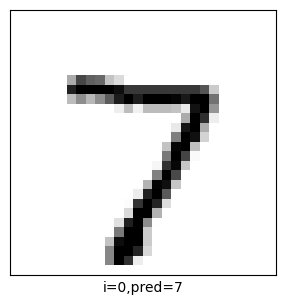

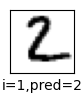

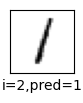

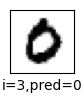

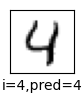

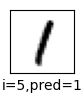

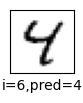

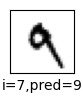

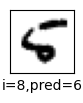

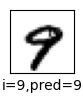

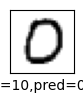

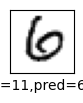

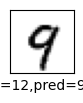

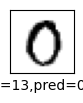

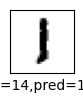

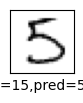

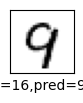

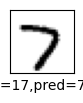

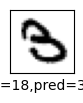

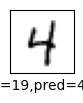

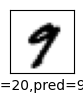

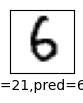

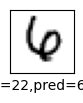

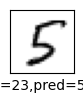

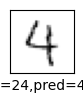

In [31]:
plt.figure(figsize=(20,20))
start_index =0

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    color='green'
    if pred!=gt:
        col='red'
    plt.xlabel('i={},pred={}'.format(start_index+i,pred))
    plt.imshow(x_test[start_index+i],cmap='binary')
    plt.show()